In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.linear_model as lm
from mpl_toolkits.mplot3d import Axes3D

In [3]:
df = pd.read_csv('a.xyz', sep=' ')
df = df.drop(df.columns[3:5], axis=1)
mat = df.to_numpy()
mat

array([[ 1.07755468,  0.95502702, -0.53163028],
       [ 1.08658857,  0.93398298, -0.51134588],
       [ 1.07552482,  0.95006177, -0.53640623],
       ...,
       [-1.77976101, -1.53270584,  0.53316433],
       [-1.77534856, -1.53509981,  0.54452064],
       [-1.76862453, -1.54747089,  0.5696933 ]])

In [132]:
%matplotlib qt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mat[:,0], mat[:,1], mat[:,2], zdir='z', c=np.abs(mat[:,2])/np.max(mat), alpha=0.01, cmap='hot')
ax.set_aspect('equal', adjustable='box')
plt.show()

In [26]:
def alg1(input: np.ndarray) -> np.ndarray:
    n = input.shape[0]
    mu = input.mean(0)
    sp = input - np.repeat(mu, n, 0).reshape(n, 3)
    gamma = 1/n * np.dot(sp.T, sp)
    _, _, Vh = np.linalg.svd(gamma)
    vmat = Vh[:2,:].T
    return np.dot(input, vmat)

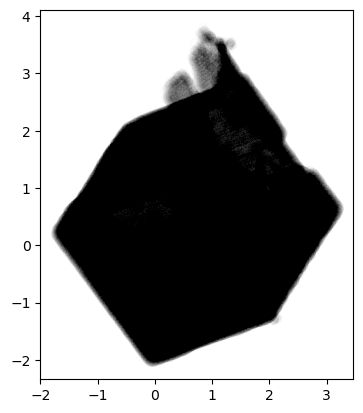

In [49]:
out = alg1(mat)
f, ax = plt.subplots()
ax.scatter(out[:,0], out[:,1], c='k', alpha=0.002)
ax.set_aspect('equal')
plt.show()

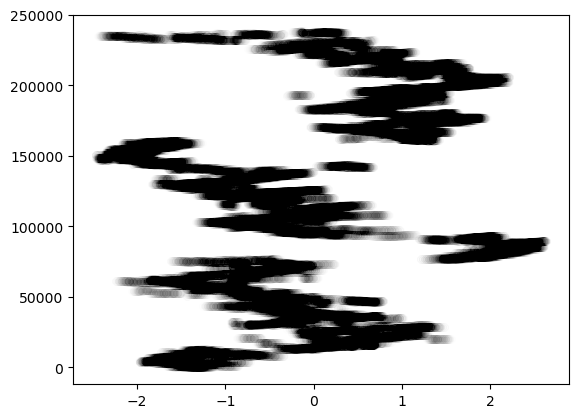

In [122]:
pca = PCA(n_components=2)
out = pca.fit_transform(df)

f, ax = plt.subplots()
a = out[:, 1]
b = np.arange(len(out[:,0]))
# len(a), len(b)
ax.scatter(a, b, c='k', alpha=0.002)
plt.show()

In [26]:
ssize = 250
end = len(df['#']) // ssize
ordf = df.sort_values(by=['#'])
indices = np.zeros((1, 3))
for i in reversed(range(end)):
    temp = ordf[i*ssize:(i+1)*ssize]
    idx = temp[['By']].idxmax()
    current = df.iloc[idx].to_numpy()[0].copy()
    if np.max(indices[:,2]) < current[2]:
        indices = np.vstack((indices,current))
indices = indices[1:,:]
indices

array([[ 2.85649521, -1.49808367,  1.9425617 ],
       [ 2.79590783, -1.49327492,  2.00313448],
       [ 2.75280656, -1.5933011 ,  2.08318384],
       ...,
       [-0.64061375,  0.97734118,  3.25046911],
       [-0.64941387,  0.93649067,  3.25220101],
       [-0.65871159,  0.9938067 ,  3.25453521]])

Equation: 0 = 3.00 + -0.43x + -0.01y - z


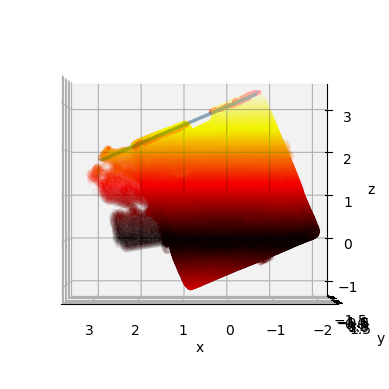

In [27]:
X_train = indices[:, :2]
y_train = indices[:, 2]
X_test = np.random.rand(200).reshape(100,2)*60
# y_test = (X_test[:, 0]**2)+(X_test[:, 1]**2)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

model = lm.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

xrange = indices[:,0]
yrange = indices[:,1]

x = np.linspace(np.min(xrange), np.max(xrange))
y = np.linspace(np.min(yrange), np.max(yrange))

coefs = model.coef_
intercept = model.intercept_
xs = np.tile(x, (len(x),1))
ys = np.tile(y, (len(y),1)).T
zs = xs*coefs[0]+ys*coefs[1]+intercept
print("Equation: 0 = {:.2f} + {:.2f}x + {:.2f}y - z".format(intercept, coefs[0],
                                                          coefs[1]))

ax.plot_surface(xs,ys,zs, alpha=0.5)
ax.scatter(mat[:,0], mat[:,1], mat[:,2], zdir='z', c=np.abs(mat[:,2])/np.max(mat), alpha=0.01, cmap='hot')
ax.set_aspect('equal', 'box')
ax.view_init(elev=0, azim=90)
plt.show()

In [28]:
norm = -np.array([coefs[0], coefs[1], -1])
norm = norm / np.linalg.norm(norm)
basis_x = np.array([1, 0, 0])
axis = np.cross(norm, basis_x)
axis = axis / np.linalg.norm(axis)
angle = -np.arccos(np.dot(norm, basis_x))
C = np.array([[0, -axis[2], axis[1]],
              [axis[2], 0, -axis[0]],
              [-axis[1], axis[0], 0]])
rot_mat = np.identity(3) + np.sin(angle)*C + (1-np.cos(angle))*np.dot(C, C)
inv_rot = np.linalg.inv(rot_mat)
mat2d = np.dot(inv_rot, mat.T).T

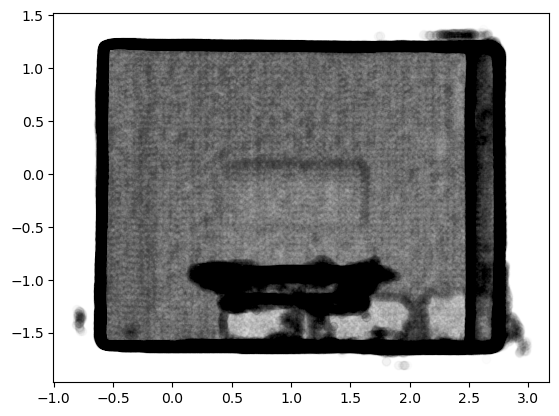

In [30]:
%matplotlib inline

plt.scatter(mat2d[:,0], mat2d[:, 1], color='k', alpha=0.01)
plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(mat2d[:,0], mat2d[:,1], mat2d[:,2], c=np.abs(mat2d[:,2])/np.max(mat2d), alpha=0.01, cmap='hot')
# # ax.scatter(mat[:,0], mat[:,1], mat[:,2], zdir='z', c=np.abs(mat[:,2])/np.max(mat), alpha=0.01, cmap='viridis')
# ax.view_init(elev=0, azim=0)
# plt.show